# EP2 - EXTRA
**Regressão na base California Housing**
      
Autor do Estudo: Fernando Zolubas Preto - Nusp: 10694192

# Data Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
#import pandas as pd
#housing = pd.read_csv("../input/california-housing/housing.csv")
import pandas as pd
test = pd.read_csv("../input/atividade-3-pmr3508/test.csv")
housing = pd.read_csv("../input/atividade-3-pmr3508/train.csv")

In [3]:
aux = housing

In [4]:
housing.shape

(14448, 10)

In [5]:
housing.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [6]:
housing = housing.dropna()

**Tabela de Indexação de Features**

* longitude________________0
* latitude__________1
* median_age_____________2
* total_rooms__________3
* total_bedrooms______4
* population_____5
* households_________6
* median_income_______7
* median_house_value_______________8
* ocena_proximity________________9

**Tradução e significado das Features:**


* Id - Identificação dos locais
* latitude: Latitude do local (em graus)
* longitude: Longitude do local
* median_age: Mediana das idades dos imóveis no local
* total_rooms: Contagem do número de cômodos das casas na região
* total_bedrooms: Contagem do total de quartos das casas na região
* population: População na região
* households: Número total de casas na região
* median_income: Mediana da renda das pessoas na região
1. * median_house_value: Variável Target.

# Data Preparation

## Vizualizando as features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6766ae36d8>,
      dtype=object)

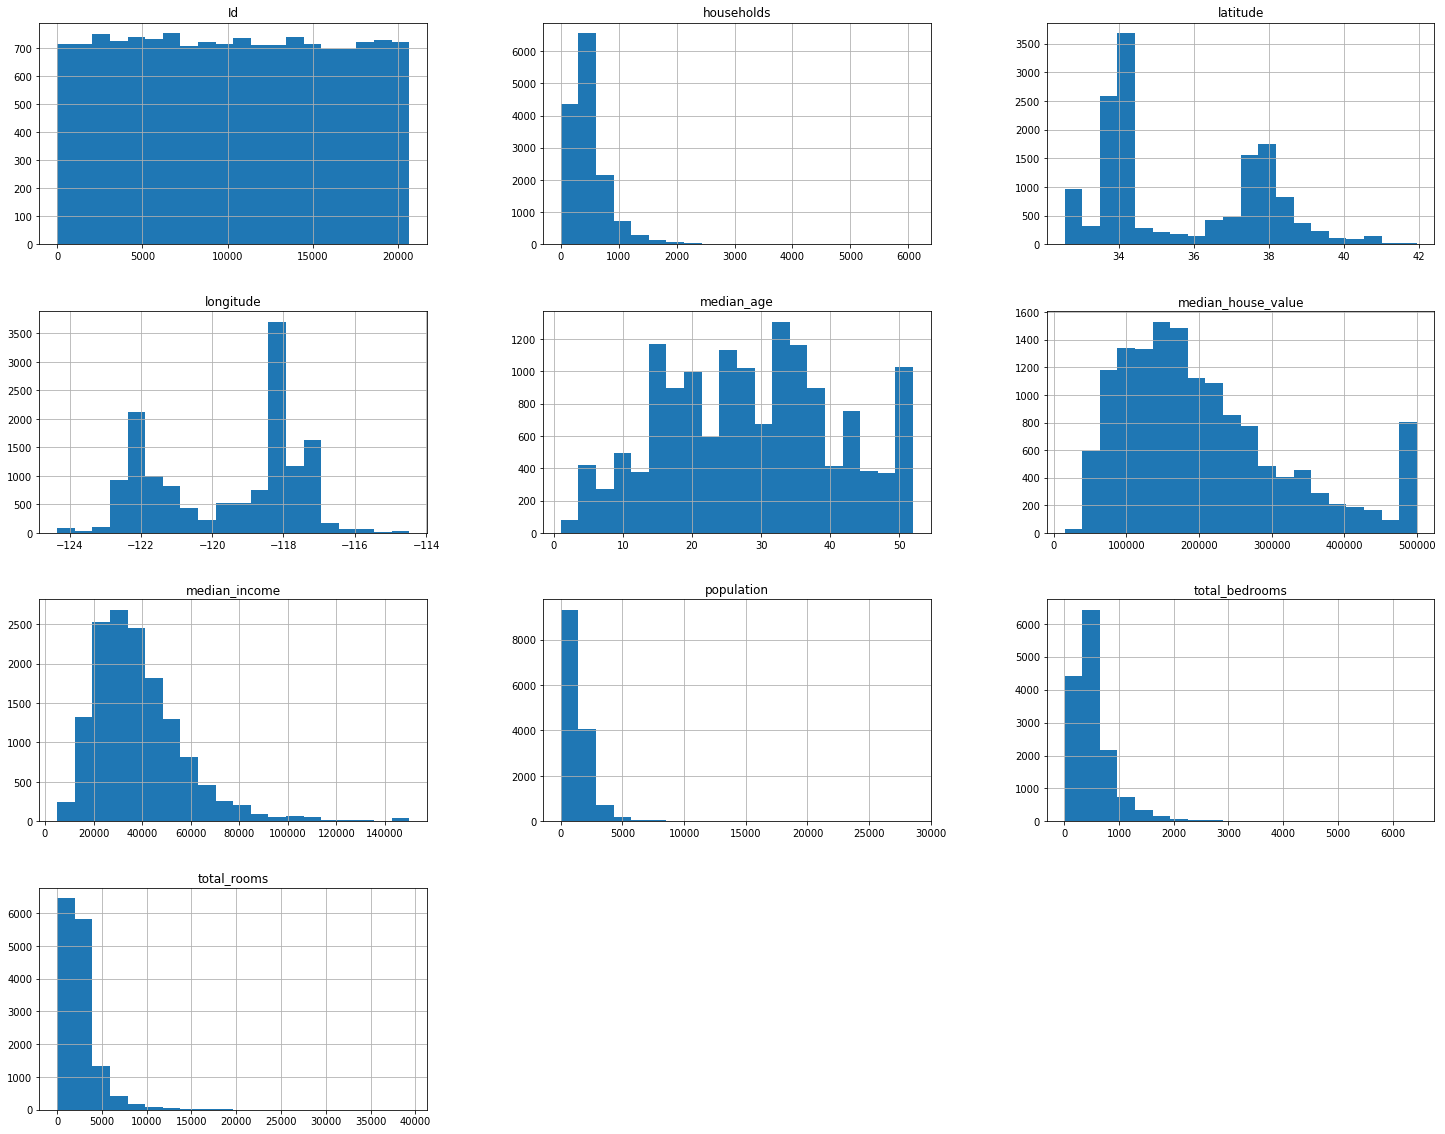

In [7]:
housing.hist(bins=20, figsize=(25,20))

De acordo com os histogramas id não influencia para o Target almejado, sendo assim:

In [8]:
housing = housing.drop(columns=["Id"])

In [34]:
y = housing.median_house_value 
X = housing.drop(columns=["median_house_value"])
X.shape

(14448, 8)

In [35]:
print('Extremos dos valores')
print(' ')
print('longitude')
print('Min ',min(X['longitude'])) 
print('Max ',max(X['longitude']))
print(' ')
print('latitude')
print('Min ',min(X['latitude']))
print('Max ',max(X['latitude']))
print(' ')
print('median_age')
print('Min ',min(X['median_age']))
print('Max ',max(X['median_age']))
print(' ')
print('total_rooms')
print('Min ',min(X['total_rooms']))
print('Max ',max(X['total_rooms']))
print(' ')
print('total_bedrooms')
print('Min ',min(X['total_bedrooms']))
print('Max ',max(X['total_bedrooms']))
print(' ')
print('population')
print('Min ',min(X['population']))
print('Max ',max(X['population']))
print(' ')
print('households')
print('Min ',min(X['households']))
print('Max ',max(X['households']))
print(' ')
print('median_income')
print('Min ',min(X['median_income']))
print('Max ',max(X['median_income']))

print(' ')
print('median_house_value')
print('Min ',min(housing['median_house_value']))
print('Max ',max(housing['median_house_value']))



Extremos dos valores
 
longitude
Min  -124.35
Max  -114.47
 
latitude
Min  32.55
Max  41.95
 
median_age
Min  1
Max  52
 
total_rooms
Min  2
Max  39320
 
total_bedrooms
Min  2
Max  6445
 
population
Min  3
Max  28566
 
households
Min  2
Max  6082
 
median_income
Min  4999
Max  150001
 
median_house_value
Min  14999
Max  500001


**Localização dos Dados de Laitude e Longitude**
(32.54,-124.35)
(32.53,-114.31)
(41.95,-124.35)
(41.95,-114.31)
OBS: O sistema de coordenadas configurado no google pode estar um pouco impreciso haja vista que ha pontos no Mar.Mas a regiao eh essa mesmo.

<img src="https://github.com/caio-freitas/AplicacoesAlgelin/blob/master/WhatsApp%20Image%202019-12-09%20at%2018.02.01.jpeg?raw=true" alt="logo" width="1000">

## Matriz de correlação

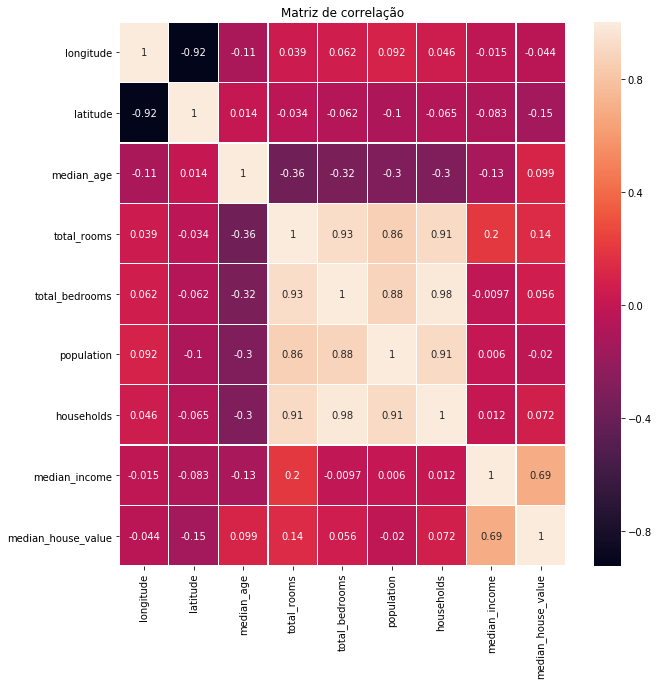

In [36]:
import seaborn
plt.figure(figsize=(10,10))
plt.title("Matriz de correlação")
seaborn.heatmap(housing.corr(), annot=True, linewidths=0.2)

A matriz de correlação traz todo o mapeamento das dependencias entre as variaveis.
Estamos interessados naquelas variaveis que exercem forte influencia sobre a variavel *median_house_value* pois deseja-se cosntruir um regressor capaz de calcular essa valor. Sendo assim, deve-se procurar na tabela acima valores que tendam para os limites -1 (um sobe o outro desce) e 1 (um desce o outro desce). Valores muito proximos de zero são ruins pois inflam os algoritimos com calculos desnecessários e por vezes distorcionais dos valor procurado. Dessa forma procuremos uma métrica para descartar valores que não são importantes.

## Features Irrelevantes

In [37]:
v_correl = [0.045,0.140,0.11, 0.13 ,0.05, 0.025, 0.065 , 0.69] #correlacoes em valroes absolutos
media = (0.045 + 0.140 +0.11 + 0.13 + 0.05 + 0.025 + 0.065 + 0.69)/8.0
print('Media do modulo das correlacoes em relacao a MEDIAN_HOUSE_VALUE = ',media)
i=1
v_irrelevantes = []
while i<8 :
    if(v_correl[i] < 0.05): #Se a correlacao for menor do que 10%
        v_irrelevantes.insert(i,i-1)
    i = i + 1
print(v_irrelevantes)

Media do modulo das correlacoes em relacao a MEDIAN_HOUSE_VALUE =  0.156875
[4]


De acordo com a tabela de atributos os atributos (4), classificados como irrelevantes por terem correlacoes abaixo de 5% com Median_house_value, São: 
* total_bedrooms
Dessa forma uma sugestão otimização será a sua eliminação.
Além disso esse atributo tem forte relação co  total_roms (93%), o que também justifica a eliminação dele na analise

## Features Fracas

In [38]:
v_correl = [0.045,0.140,0.11, 0.13 ,0.05, 0.025, 0.065 , 0.69]
media = (0.045 + 0.140 +0.11 + 0.13 + 0.05 + 0.025 + 0.065 + 0.69)/8.0
print('Media do modulo das correlacoes em relacao a MEDIAN_HOUSE_VALUE = ',media)
i=1
v_irrelevantes = []
while i<8 :
    if(v_correl[i] < media): #Se a correlacao for menor do que 10%
        v_irrelevantes.insert(i,i-1)
    i = i + 1
print(v_irrelevantes)

Media do modulo das correlacoes em relacao a MEDIAN_HOUSE_VALUE =  0.156875
[0, 1, 2, 3, 4, 5]


As Features que possuem correlação menor do que a media das correlacoes em modulo são, de acordo com a tabela de indexação:
* Longitude
* Latitude
* Housing_median_age
* Total_rooms
* Total_bedroms

Estranhamente ao que diz a intuição a localização da casa parace ter pouca relação com o valor médio da casa. Na verdade quase nenhum dessas features, pela intuição deveiria estar nessa classe chamada "features fracas".
Sendo assim, numa tentativa de casar intuição e dados iremos tentar criar a partir dessas features outras cuja correlação com *median_house_value* seja mais alta.

## Criando Features - Features Engeneering

Feature de Habitacao
* Logica: Mais pessoas por comodo ou por cama talvez seja um local mais pobre.

In [39]:
aux["NEW_persons_per_room"] = X["population"]/X["total_rooms"]
aux["NEW_persons_per_bedroom"] = X["population"]/X["total_bedrooms"]

Feature de Valor indireto da Casa
* Logica: Pessoas que ganham mais eventualmente moram em casas mais novas

In [40]:
aux["NEW_house_age/income"] = X["median_age"]/X["median_income"]

## Analisando novas Features - Nova Matriz de Correlação

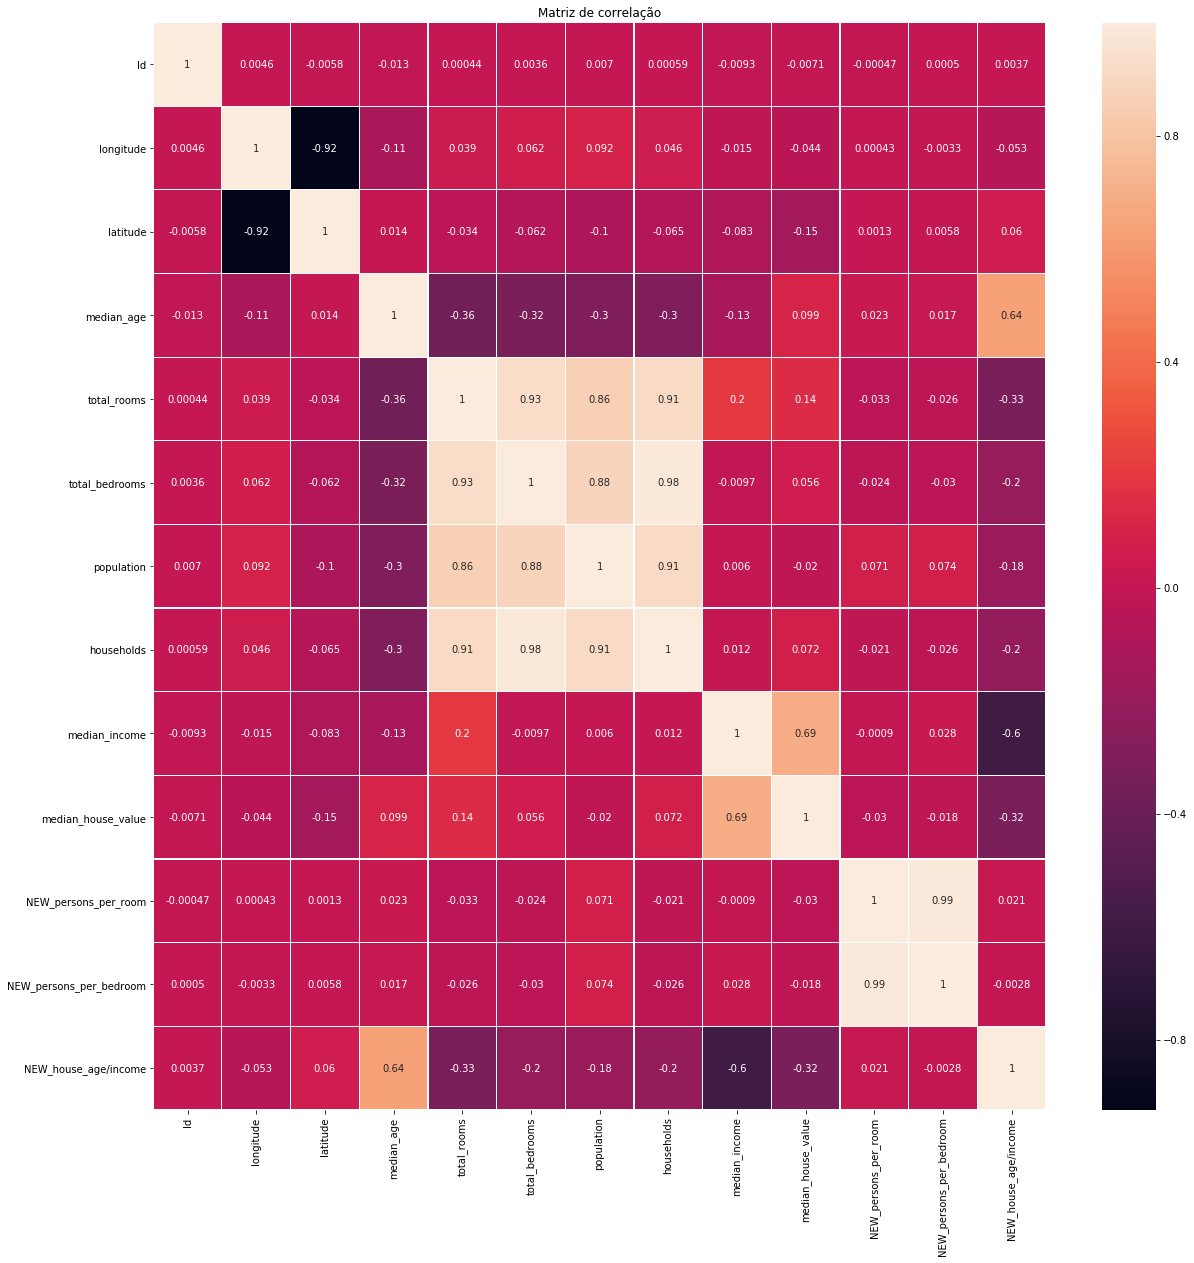

In [41]:
import seaborn
plt.figure(figsize=(20,20))
plt.title("Matriz de correlação")
seaborn.heatmap(aux.corr(), annot=True, linewidths=0.2)

Ao analisar a matriz percebe-se que:
* É razoável tentar considerar NEW_house_age/income pois aumentou a influencia em modulo de house_median_age de 0.11 para 0.32 
* Não Considerar NEW_persosns_per_bedroom por ter uma correlacao pior com a feature target
* Não Considerar NEW_persosns_per_room por ter uma correlacao pior com a feature target pois total_rooms tem uma correlação uma ordem de grandeza maior

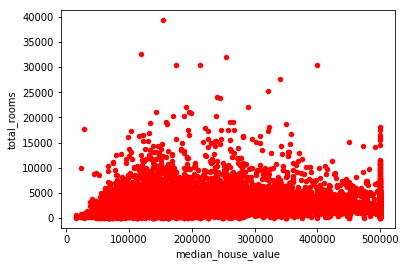

In [42]:
aux.plot(kind='scatter',x='median_house_value',y='total_rooms',color='red')
plt.show()

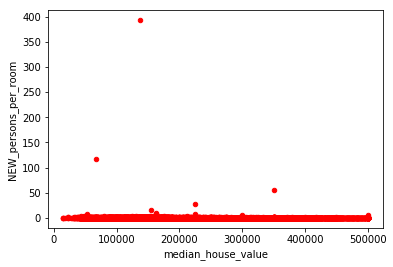

In [43]:
aux.plot(kind='scatter',x='median_house_value',y='NEW_persons_per_room',color='red')
plt.show()

Vemos que o numero de pessoas por comodo é constante independentemente do valor da casa e também que o numero total de comodos não necessariamente interfere no preco da casa mas tentemos utilizar a feature relacionada a esse ultimo.

# Sugestões de Otimização

* 1) Desconsiderar o atributo "total_bedrooms" dada sua baixa influencia no "median_house_value" - Matriz de correlação. **"total_bedrooms" (Nao usar)**


In [44]:
trai1 = X
trai1.drop(columns=["total_bedrooms"])

,longitude,latitude,median_age,total_rooms,population,households,median_income
0,-120.85,37.57,27,819,451,150,34934
1,-117.74,34.06,48,2438,1508,548,28983
2,-118.11,33.92,32,1016,729,177,43000
3,-118.12,34.15,35,1760,984,384,34167
4,-120.63,37.41,27,2083,1462,479,26439
...,...,...,...,...,...,...,...
14443,-117.21,32.75,15,1716,914,672,10612
14444,-121.18,38.78,13,3480,1432,532,61642
14445,-121.33,38.65,23,2446,1132,513,26266
14446,-118.37,34.02,44,1944,981,377,26154


* 2) Considerar o artibuto novo NEW_house_age/income, chamado agora de **house_age/income (OK)**


In [45]:
trai2 = X
trai2["house_age/income"] = X["median_age"]/X["median_income"]

* 3) Retirar total_rooms. **total_rooms (nao usar)**

In [46]:
trai3 = X
trai3.drop(columns=["total_rooms"])
trai3.drop(columns=["total_bedrooms"])

,longitude,latitude,median_age,total_rooms,population,households,median_income,house_age/income
0,-120.85,37.57,27,819,451,150,34934,0.000773
1,-117.74,34.06,48,2438,1508,548,28983,0.001656
2,-118.11,33.92,32,1016,729,177,43000,0.000744
3,-118.12,34.15,35,1760,984,384,34167,0.001024
4,-120.63,37.41,27,2083,1462,479,26439,0.001021
...,...,...,...,...,...,...,...,...
14443,-117.21,32.75,15,1716,914,672,10612,0.001413
14444,-121.18,38.78,13,3480,1432,532,61642,0.000211
14445,-121.33,38.65,23,2446,1132,513,26266,0.000876
14446,-118.37,34.02,44,1944,981,377,26154,0.001682


* 4) Combinar as tres estrategias e retirar tambem as demais "features fracas"

In [47]:
trai4 = X
trai4["house_age/income"] = X["median_age"]/X["median_income"]
trai4.drop(columns=["total_rooms"])
trai4.drop(columns=["total_bedrooms"])
trai4.drop(columns=["longitude"])
trai4.drop(columns=["latitude"])
trai4.drop(columns=["median_age"])


,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,house_age/income
0,-120.85,37.57,819,157,451,150,34934,0.000773
1,-117.74,34.06,2438,599,1508,548,28983,0.001656
2,-118.11,33.92,1016,190,729,177,43000,0.000744
3,-118.12,34.15,1760,447,984,384,34167,0.001024
4,-120.63,37.41,2083,444,1462,479,26439,0.001021
...,...,...,...,...,...,...,...,...
14443,-117.21,32.75,1716,702,914,672,10612,0.001413
14444,-121.18,38.78,3480,528,1432,532,61642,0.000211
14445,-121.33,38.65,2446,523,1132,513,26266,0.000876
14446,-118.37,34.02,1944,458,981,377,26154,0.001682


# Regressores

## 1) Random Forest

In [ ]:
def RF_cv_select_pred(num,train,y):  
    trainY = y
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators=num, criterion='mse', min_samples_split=5, 
                          min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features="sqrt", 
                         random_state=None, verbose=0, warm_start=True)
    #Usando os dados
    forest.fit(train, trainY)
    score = forest.score(train, trainY)
    print (score)
    predictions = forest.predict(test)
    return score

In [ ]:
RF_cv_select_pred(30,X,y)

In [ ]:
i=1
arr_res = []
while i<150 :
    rf = RF_cv_select_pred(i,trai1,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

In [ ]:
i=1
arr_res = []
while i<150 :
    rf = RF_cv_select_pred(i,trai2,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

In [ ]:
i=1
arr_res = []
while i<150 :
    rf = RF_cv_select_pred(i,trai3,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

In [ ]:
i=1
arr_res = []
while i<150 :
    rf = RF_cv_select_pred(i,trai4,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

## Resultados Random Forest

Para as trataivas planejadas (1,2,3,4) no item Otimizacoes obteve-se o seguinte resultado com Random Forest:
* 1) 88.79% - 126 arvores
* 2) 88.77% - 76 arvores
* 3) 88.80% - 136 arvores
* 4) 88.80% - 96 arvores


Donde se conlcui que o melhor regressor para tecnica Random Forest encontrado nesse estudo alcancou **88.80%** de acuracia a um custo de **96 arvores**. A retirada na preparacao dos dados de features pouco influentes foi de extrema importancia pois reduziu significativamente a complexidade do algoritimo para o mesmo resultado em relacao a terceira tentativas

## Bosting em Random Forest e em Rede Neural

In [ ]:
def adaboost_neural(num,train,y):  
    trainY = y   
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn import neural_network

    neural_net = neural_network.MLPRegressor(hidden_layer_sizes=(100,),
                                       activation='relu', solver='adam',
                                       learning_rate='adaptive', max_iter=800,
                                       learning_rate_init=0.01, warm_start = True, alpha=0.01)
    adaboost1 = AdaBoostRegressor(base_estimator=neural_net, n_estimators=num, learning_rate=0.01, random_state=None)
    adaboost1.fit(train, trainY)
    neural = adaboost1.score(train, trainY)*100
    print ("AdaBoost on Neural Network score: ", str(neural), "%")
    return neural

In [23]:
def adaboost_RF(num,train,y):  
    trainY = y   
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators=num, criterion='mse', min_samples_split=5, 
                          min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features="sqrt", 
                         random_state=None, verbose=0, warm_start=True)
    
    adaboost2 = AdaBoostRegressor(base_estimator=forest, n_estimators=num, learning_rate=0.01, random_state=None)
    adaboost2.fit(train, trainY)
    RF = adaboost2.score(train, trainY)*100
    print ("AdaBoost on Random Forest score: ", str(RF), "%")
    return RF

Aplicacoes:

In [ ]:
adaboost_neural(7,trai1,y)


In [ ]:
adaboost_neural(7,trai2,y)


In [ ]:
adaboost_neural(7,trai3,y)


In [ ]:
adaboost_neural(7,trai4,y)

In [24]:
i=35
arr_res = []
while i<50 :
    rf = adaboost_RF(i,trai1,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

AdaBoost on Random Forest score:  88.28849774858313 %
35
AdaBoost on Random Forest score:  88.44603080270362 %
40
AdaBoost on Random Forest score:  88.56559695508236 %
45
List of Indices of maximum element : [2]
Max accuracy is : 88.56559695508236


In [25]:
i=35
arr_res = []
while i<50 :
    rf = adaboost_RF(i,trai2,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

AdaBoost on Random Forest score:  88.35082005865691 %
35
AdaBoost on Random Forest score:  88.4292142819789 %
40
AdaBoost on Random Forest score:  88.59811918948004 %
45
List of Indices of maximum element : [2]
Max accuracy is : 88.59811918948004


In [26]:
i=35
arr_res = []
while i<50 :
    rf = adaboost_RF(i,trai3,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

AdaBoost on Random Forest score:  88.28904179026121 %
35
AdaBoost on Random Forest score:  88.50102311313711 %
40
AdaBoost on Random Forest score:  88.49506585584582 %
45
List of Indices of maximum element : [1]
Max accuracy is : 88.50102311313711


In [27]:
i=35
arr_res = []
while i<50 :
    rf = adaboost_RF(i,trai4,y)
    arr_res.insert(i, rf)
    print(i)
    i = i + 5
arr = np.array(arr_res)
Index_Max_Accuracy = np.where(arr == np.amax(arr))
print('List of Indices of maximum element :', Index_Max_Accuracy[0])
# Get the maximum element from a Numpy array
print('Max accuracy is :', np.amax(arr))

AdaBoost on Random Forest score:  88.3863894086393 %
35
AdaBoost on Random Forest score:  88.45112156673025 %
40
AdaBoost on Random Forest score:  88.56788715116382 %
45
List of Indices of maximum element : [2]
Max accuracy is : 88.56788715116382


## Resultados Adaboost

Rede Neural
* 1) 63.50% 
* 2) 63.67%
* 3) 63.84%
* 4) 63.61%

Random Forest
* 1) 88.57% - 45 arvores
* 2) 88.60% - 45 arvores
* 3) 88.50% - 45 arvores
* 4) 88.57% - 45 arvores

obs: A pesquisa foi feita de 1 ate 50 variando i de 5 em 5, mas para submissao ser mais rapida reconfigurou-se para os valores atuais.

Utilizando a tecnica de boosting era esperado que se encontra-se resultados melhores do que com os outros algoritimos de regressao, mas isso nao aconteceu pois nao houve poder computacional o bastante para se chegar em boas 
otimizacoes de seus hiper parametros sendo que a pesquisa das 4 redes neurais e das 4 Random Forest cm adaboost demoraram mais de 1 hora para ficar prontas com uma tentaiva minima de otimizacao de hiper parametros para Random forest
e tentativa nula para Redes Neurais. 

A conclusao eh que embora esses algoritimos sejam muito impressionantes pelo que realizam a dificuldade computacional de realiza-los e otimiza-los nao os torna muito vantajosos em aplicacoes mais simples como essa

## Regressão Linear

In [48]:
def linear(train,y):  
    trainY = y   
    from sklearn.linear_model import LinearRegression
    LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
    LR.fit(train, trainY)
    lin = LR.score(train, trainY)*100
    print ("Linear: ", str(lin), "%")
    return lin

In [50]:
print(linear(trai1,y))
print(linear(trai2,y))
print(linear(trai3,y))
print(linear(trai4,y))

Linear:  63.88267570358464 %
63.88267570358464
Linear:  63.88267570358464 %
63.88267570358464
Linear:  63.88267570358464 %
63.88267570358464
Linear:  63.88267570358464 %
63.88267570358464


## Resultados Regressão Linear
Embora a regressão Linear não tenha nem de longe atingido o melhor resultado, esse metodod atinngiu um resultado na mesma ordem de grandeza, na verdade até superior as famososas redes neurais, em fracoes de segundos ao passo que as redes neurais foram executadas em uma dezena de minutos aproximadamente. Ou seja, isso mostra o potencial da regressão linear para tomar decisoes muito rapidas mas de baixa qualidade. A vantagem desse metodo é sem duvida o minimo poder computacional envolvido embora é claro que é impossivel obter os mesmos resultados de algoritimos mais robustos como Random Forest

# Resultado Geral

O algortimo campeão, dentre os testados, é o Random Forest pois sua simplicidade permite que se faça o ajsute fino de seus hiper-parâmetros ao mesmo que sua robustez garante bons resultados.
O regressor mais bem avaliado foi o **Random Forest de 96 arvores** com **88.80% de acuracia** .